# Assignment 4: Implementation of ConvNets (start early on this one!)
-------------------------------------
**Dr. Dave Wanik - OPIM 5509: Introduction to Deep Learning - University of Connecticut**

* Full Name: Patricia (PJ) Watson
* Student ID (7 digit number): 2887247


Hi class, this is my first time giving a homework like this on ConvNets, but I think you will really enjoy it since it's practical ConvNet implementation vs. a simple math problem. *If you have any code problems, please post on the Discussion Board so your classmates and I can help!*

Below is a great demo script that I found on how to use 'Bing image downloader' with Colab! Please clean up/update the script to download at least 200 images of any two classes you would like to predict (such as 'person wearing mask' and 'person not wearing a mask'). You may need to download a few different search queries if Bing limits you to 100 images - be creative about how you can get more data. The data will download locally onto this runtime (click the folder icon on the left), and you can move files and create new folders for train, test, validation partition. You can delete any unncessary code, of course.

We haven't shown how to do this in class, but here's a code that shows you how to copy N images over from train folder to the test folder:
* https://stackoverflow.com/questions/60090552/copying-file-from-one-directory-to-another-directory-in-google-colab

If you get stuck prepping your data on the local runtime, reach out on the Discussion Board!

When you submit your assignment, I should be able to run your ENTIRE script without mounting the Google Drive since everything is locally downloaded and prepared. This will take some extra coding but I think you can hack the stuff below to make it work.

After your data is prepared, review my existing scripts and use the image generators to read data and fit a model like we did for Cats and Dogs! You can go as far as you want with this assignment in terms of the modeling but **you must build at least one vanilla ConvNet model and you must evaluate the model** (remember: evaluating a generator can be tricky, see my code for help.) If you want to go above and beyond, try using transfer learning or fine tuning or data augmentation. You will probably get a better fitting model!

Of course, your script should be beautifully laid out with lots of subheaders and comments. When you are done with this assignment, it should be of such quality that you would be proud to share this notebook with a potential employer to demonstrate your computer vision skills.

**Rubric:**
* (10 points) Provide a nice five to ten sentence of the problem you are trying to solve with image classification (please only do binary classification for this assignment.)
* (40 points) Image downloader code below has been adapted to work on local runtime. New directories are created for train, test and validation partition of each class.
* (20 points) Fit a ConvNet model
* (20 points) Evaluate the ConvNet model
* (10 points) At least five meaningful, thoughtful bullets of what you learned in this assignment.

Severe points will be deducted if the notebook does not have lots of headers, text cells, comments etc. Zero points if the code is not 'run all' in its entirety before submitting (so that I can review the code output!)

Ask friends for help but do your own work. I hope you enjoy this assignment.


# Problem Definition

💚 Approach: Based on Reilly Chap 4.5, "The universal workflow of machine learning"

1. What will your input data be?  200 images each of zebras and horses are downloaded using the Bing image downloader. We can see that various websites are used for the image retrieval.
2. What are you trying to predict? We are predicting whether an image is a horse or a zebra. This problem was chosen to see whether the similarity in shape and color could be overcome to provide an accurate prediction.
3. What type of problem are you facing? This is a binary classification problem.
4. Hypotheses made at this stage:

  a. outputs can be predicted given your inputs
  
  b. available data is sufficiently informative to learn the relationship between inputs and outputs
5. Success will be measured by accuracy, precision and recall, examining plots and the confusion matrix.

💚 Gameplan
1. Download 100 images each of zebras and horses
2. Split data 50/25/25 to training/validation/test partitions
3. Examine images and confirm good counts in partitions
4. Build, compile, fit and evaluate models with different complexity
5. Try augmentation on baseline model

Background for future reference: from https://learning.oreilly.com/library/view/deep-learning-with/9781617294433/OEBPS/Text/04.xhtml#ch04lev2sec5

Evaluating a model always boils down to splitting the available data into three sets: training, validation, and test. You train on the training data and evaluate your model on the validation data. Once your model is ready for prime time, you test it one final time on the test data.

Simple hold-out validation

Set apart some fraction of your data as your test set. Train on the remaining data, and evaluate on the test set. As you saw in the previous sections, in order to prevent information leaks, you shouldn’t tune your model based on the test set, and therefore you should also reserve a validation set.


# Set Up Enviroment

In [3]:
# Bing image downloader
!pip install bing-image-downloader
from bing_image_downloader import downloader

# For copying images to training, validation, and test directories
import os, shutil

# For CNN
!pip install tensorflow
import tensorflow as tf
print(tf.__version__)   # Checking version due to earlier notebook compatability problems
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

import sys
import random

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

2.17.0


In [47]:
# If needed first time in
# !pip install --upgrade tensorflow
# !pip install --upgrade keras


# Dataset Assembly

Download 100 images each of zebras and horses. Initially, additional criteria such as a set of colors had been included, but removed for runtime considerations.
(200 images each for zebras and horses was attempted as well but abandoned after an hour.)

## Download Zebra and Horse Images
Download 100 images each of zebras and horses.


In [4]:
# Define search queries
queries = ['Zebras', 'Horses']


In [5]:
# Download 100 images each of zebras and horses
num_downloads = 0
for query in queries:
  if num_downloads >= 200:
    break  # Stop downloading after 400 images total
  full_query = f'{query}'
  downloader.download(full_query, limit=100, output_dir='images', adult_filter_off=True, force_replace=False, timeout=300)
  num_downloads += 1

[%] Downloading Images to /content/images/Zebras


[!!]Indexing page: 1

[%] Indexed 35 Images on Page 1.


[%] Downloading Image #1 from https://www.thoughtco.com/thmb/2tpZ-IC6Skv9ILYz-0ywNyZLhTQ=/2122x1415/filters:no_upscale():max_bytes(150000):strip_icc()/188063011-56a27c4d3df78cf7727695e7.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://animals.sandiegozoo.org/sites/default/files/2016-08/hero_zebra_animals.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://www.animalspot.net/wp-content/uploads/2012/02/Pics-of-Zebra.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://images6.fanpop.com/image/photos/35200000/Zebras-zebras-35204219-2800-2410.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://upload.wikimedia.org/wikipedia/commons/8/83/Zebra_Botswana_edit02.jpg
[%] File Downloaded !

[%] Downloading Image #6 from http://www.travelswithgannonandwyatt.com/wp-content/uploads/2013/07/IMG_3615_web_zebra.jpg
[!] Issue getting: http://www

### Examine Zebra and Horse Images
Check counts, look at images.

In [6]:
# Confirm/count the number of images of zebras and horses
!ls -1 /'/content/images/Horses' | wc -l
!ls -1 /'content'/'images'/'Zebras' | wc -l

100
100


In [7]:
# Check work, examine Zebras
from PIL import Image # Import the Image module from the PIL library

image_directory = 'images'
zebra_directory = os.path.join(image_directory, 'Zebras')

# Get a list of all files in the zebra directory
zebra_files = os.listdir(zebra_directory)

# Check if there are any files in the zebra directory
if not zebra_files:
  print("No zebra images found in the directory.")
else:
  first_zebra_image_path = os.path.join(zebra_directory, zebra_files[0])
  img = Image.open(first_zebra_image_path) # Now Image is defined and can be used

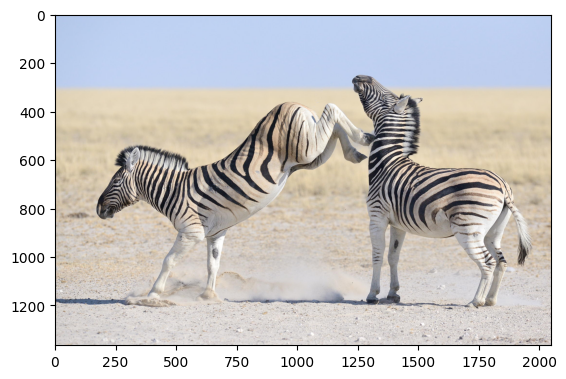

In [ ]:
plt.imshow(img)
plt.show()

In [8]:
# Check work, examine Horses

image_directory = 'images'
horse_directory = os.path.join(image_directory, 'Horses')

# Get a list of all files in the horses directory
horse_files = os.listdir(horse_directory)

# Check if there are any files in the horse directory
if not horse_files:
  print("No horse images found in the directory.")
else:
  first_horse_image_path = os.path.join(horse_directory, horse_files[0])
  img = Image.open(first_horse_image_path) # Now Image is defined and can be used

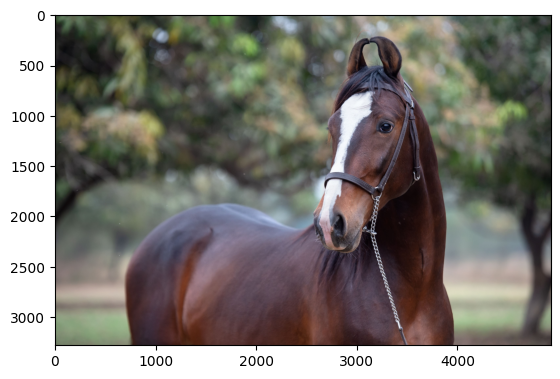

In [ ]:
plt.imshow(img)
plt.show()

## Create Train/Validation/Test Directories

Create train, validation and test directories with 50, 25 and 25 images, respectively, of zebras and horses. Examine directories to confirm counts and balance of images.


In [9]:
# Create Train/Validation/Test Directories
base_dir = '/content/images_dataset'
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_horses_dir = os.path.join(train_dir, 'horses')
os.mkdir(train_horses_dir)

train_zebras_dir = os.path.join(train_dir, 'zebras')
os.mkdir(train_zebras_dir)

validation_horses_dir = os.path.join(validation_dir, 'horses')
os.mkdir(validation_horses_dir)

validation_zebras_dir = os.path.join(validation_dir, 'zebras')
os.mkdir(validation_zebras_dir)

test_horses_dir = os.path.join(test_dir, 'horses')
os.mkdir(test_horses_dir)

test_zebras_dir = os.path.join(test_dir, 'zebras')
os.mkdir(test_zebras_dir)
# Look left, exaimne files

### Copy Images to Train, Validation, Test

In [10]:
# Copy 50, 25, 25 images to train, validaiton and test, respectively
# Source directory
source_dir = "/content/images/Horses"

# Target directories for horses
train_dir = "/content/images_dataset/train/horses"
validation_dir = "/content/images_dataset/validation/horses"
test_dir = "/content/images_dataset/test/horses"

# Get a list of all image files in the source directory
# Examining the images, we see that the suffixes can vary (JPG, jpg, png )
image_files = [f for f in os.listdir(source_dir) if f.endswith(".jpg") or f.endswith(".JPG") or f.endswith(".jpeg") or f.endswith(".png")]

# Shuffle the list of image files randomly
random.shuffle(image_files)

# Copy images to train, validation, and test directories
for i, image_file in enumerate(image_files):
    source_path = os.path.join(source_dir, image_file)
    if i < 50:
        target_dir = train_dir
    elif i < 75:
        target_dir = validation_dir
    else:
        target_dir = test_dir
    target_path = os.path.join(target_dir, image_file)
    shutil.copy(source_path, target_path)



In [11]:
# Copy 50, 25, 25 images to train, validaiton and test, respectively
# Source directory
source_dir = "/content/images/Zebras"

# Target directories for zebras
train_dir = "/content/images_dataset/train/zebras"
validation_dir = "/content/images_dataset/validation/zebras"
test_dir = "/content/images_dataset/test/zebras"

# Get a list of all image files in the source directory
# Examining the images, we see that the suffixes can vary (JPG, jpg, png )
image_files = [f for f in os.listdir(source_dir) if f.endswith(".jpg") or f.endswith(".JPG") or f.endswith(".jpeg") or f.endswith(".png")]

# Shuffle the list of image files randomly
random.shuffle(image_files)

# Copy images to train, validation, and test directories
for i, image_file in enumerate(image_files):
    source_path = os.path.join(source_dir, image_file)
    if i < 50:
        target_dir = train_dir
    elif i < 75:
        target_dir = validation_dir
    else:
        target_dir = test_dir
    target_path = os.path.join(target_dir, image_file)
    shutil.copy(source_path, target_path)

In [12]:
# Check work
# Display number of images in train, validation and test for horses and zebras
!ls -1 /'/content/images_dataset/train/horses' | wc -l
!ls -1 /'/content/images_dataset/train/zebras' | wc -l
!ls -1 /'/content/images_dataset/validation/horses' | wc -l
!ls -1 /'/content/images_dataset/validation/zebras' | wc -l
!ls -1 /'/content/images_dataset/test/horses' | wc -l
!ls -1 /'/content/images_dataset/test/zebras' | wc -l

50
50
25
25
25
22


### Examine Zebra and Horse Images
Check counts, look at images.

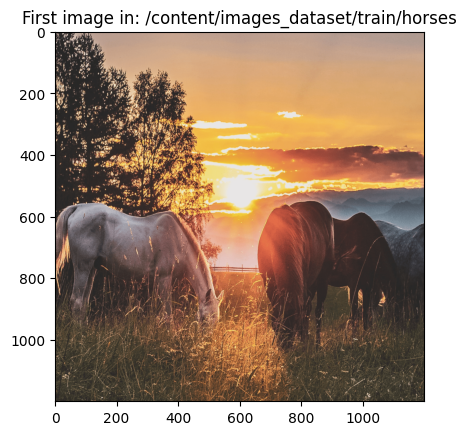

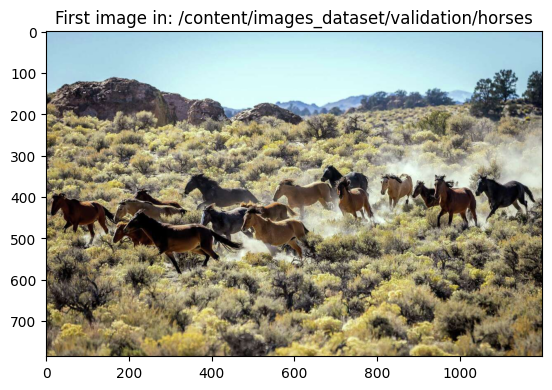

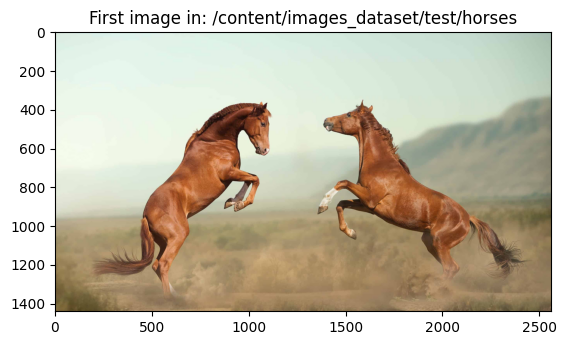

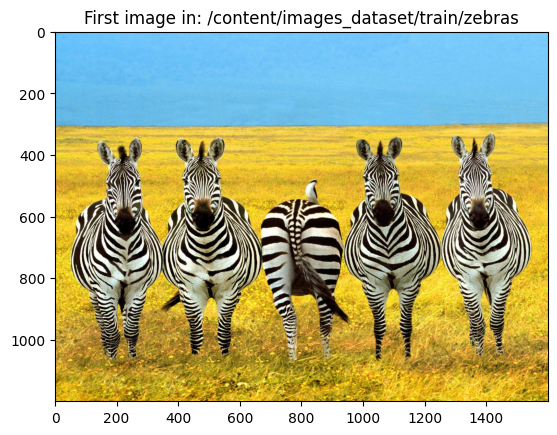

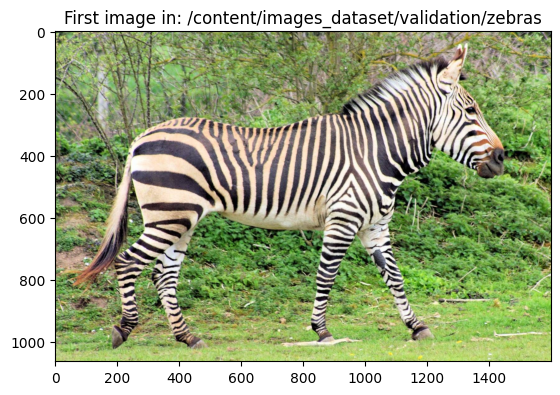

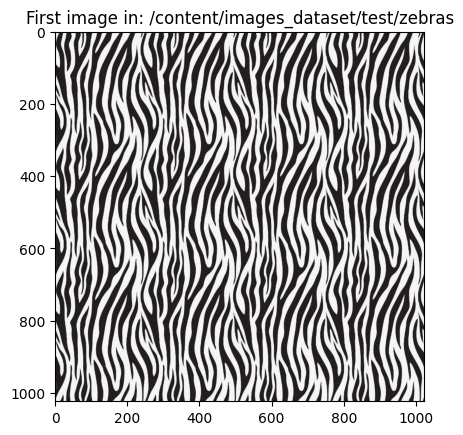

In [13]:
# Check work, examine first images in train, validation, test for horses and zebras
# Just making sure we have the images we expect in each directory before modeling
directories = [
    '/content/images_dataset/train/horses',
    '/content/images_dataset/validation/horses',
    '/content/images_dataset/test/horses',
    '/content/images_dataset/train/zebras',
    '/content/images_dataset/validation/zebras',
    '/content/images_dataset/test/zebras'
]

for directory in directories:
  image_files = os.listdir(directory)
  if not image_files:
    print(f"No images found in the directory: {directory}")
  else:
    first_image_path = os.path.join(directory, image_files[0])
    img = Image.open(first_image_path)
    plt.imshow(img)
    plt.title(f"First image in: {directory}")
    plt.show()


# Build, Compile, Fit Model 1: 3 Conv Layers, 3 Max Pooling, Epochs = 10
Assuming that things go well, you need to make three key choices to build your first working model:

Last-layer activation— This establishes useful constraints on the network’s output. For instance, the IMDB classification example used sigmoid in the last layer; the regression example didn’t use any last-layer activation; and so on.
Loss function— This should match the type of problem you’re trying to solve. For instance, the IMDB example used binary_crossentropy, the regression example used mse, and so on.
Optimization configuration— What optimizer will you use? What will its learning rate be? In most cases, it’s safe to go with rmsprop and its default learning rate.

## Build Network
The convnet is a stack of alternated Conv2D (with relu activation) and MaxPooling2D layers to augment the capacity of the network and to further reduce the size of the feature maps so they aren’t overly large when you reach the Flatten layer. Here, because we start from inputs of size 150 × 150 (a somewhat arbitrary choice), we end up with feature maps of size 7 × 7 just before the Flatten layer.The depth of the feature maps progressively increases in the network (from 32 to 128), whereas the size of the feature maps decreases (from 150 × 150 to 7 × 7), a common convnet pattern.

Because it's a binary-classification problem, the network end with a single unit (a Dense layer of size 1) and a sigmoid activation. This unit will encode the probability that the network is looking at one class or the other.

In [68]:
model = models.Sequential()
# 3 convolution layers and 3 max pooling layers
model.add(layers.Conv2D(16, (3, 3), activation='relu',  # 3x3 kernels, stride along image = 1
                                                        # 32 kernels resujlting in 32 feature maps; light down sampling
                        input_shape=(150, 150, 3)))     # color image: 3 channels, each image is 150x150
model.add(layers.MaxPooling2D((2, 2)))    # no trainable parms; agressive down sampling in pooling step

model.add(layers.Conv2D(32, (3, 3), activation='relu')) # increasing # of filters for fine tuning
model.add(layers.MaxPooling2D((2, 2)))    # no trainable parms; agressive down sampling in pooling step

model.add(layers.Conv2D(64, (3, 3), activation='relu')) # increasing # of filters for fine tuning
model.add(layers.MaxPooling2D((2, 2)))    # no trainable parms; agressive down sampling in pooling step

model.add(layers.Flatten())

model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [69]:
# Examine model
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 148, 148, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 74, 74, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 72, 72, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 36, 36, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 34, 34, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 17, 17, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 18496)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │       2,367,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,391,329 (9.12 MB)

 Trainable params: 2,391,329 (9.12 MB)

 Non-trainable params: 0 (0.00 B)

In [70]:
# Compile model
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

## Prepare Data for Modeling
But first, you should format your data in a way that can be fed into a machine-learning model—here, we’ll assume a deep neural network:

As you saw previously, your data should be formatted as tensors.
The values taken by these tensors should usually be scaled to small values: for example, in the [-1, 1] range or [0, 1] range.
If different features take values in different ranges (heterogeneous data), then the data should be normalized.
You may want to do some feature engineering, especially for small-data problems.

💚 Approach (from O'Reily for future reference)
1. Read the picture files.
2. Decode the JPEG content to RGB grids of pixels.
3. Convert these into floating-point tensors.
4. Rescale the pixel values (between 0 and 255) to the [0, 1] interval

In [71]:
# Need to reset generators 2nd time in
# When you rerun a model without resetting the generators, they continue from their previous state.
# This means that they might be iterating over the same batches of data,
# which can lead to the model getting stuck in a local minimum or overfitting.

train_generator.reset()
validation_generator.reset()

In [72]:
# This code is from O'Reilly
# Note naming mismatch
# Data should be formatted into appropriately preprocessed floating-point tensors
# before being fed into the network
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_dir = '/content/images_dataset/train'
validation_dir = '/content/images_dataset/validation'

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=5,    # reduced from 20
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=5,    # reduced from 20
        class_mode='binary')


Found 100 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


In [73]:
# Examine generator output
for data_batch, labels_batch in train_generator:
  print('data batch shape:', data_batch.shape)
  print('labels batch shape:', labels_batch.shape)
  break     # generator yields batches indef so have to break
# Batches of 150 × 150 RGB images (shape (5, 150, 150, 3)) and binary labels (shape (5,)).


data batch shape: (5, 150, 150, 3)
labels batch shape: (5,)


In [74]:
# Refresh
steps_per_epoch=train_generator.samples // train_generator.batch_size
print("train_generator.samples:", train_generator.samples)
print("train_generator.batch_size:", train_generator.batch_size)
print("steps per epoch:", steps_per_epoch)
validation_steps=validation_generator.samples // validation_generator.batch_size
print("validation_generator.samples:", validation_generator.samples)
print("validation_generator.batch_size:", validation_generator.batch_size)
print("validation steps:", validation_steps)

train_generator.samples: 100
train_generator.batch_size: 5
steps per epoch: 20
validation_generator.samples: 50
validation_generator.batch_size: 5
validation steps: 10


## Fit Model


In [76]:
# Fit the model using a batch generator
# Define number of epochs, dynamically calculate steps_per_epoch, validation_steps
# model.fit will default to calculations for steps_per_epoch and validation_steps
# This code was commented out initially to debug why epoch 2 training accuracy
# was 0, indicating running out of data early

# If steps_per_epoch and validation_steps are NOT commented out,
# run out of data in epoch 2

epochs = 10             # decreased from 20

history = model.fit(
    train_generator,
#steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
#validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=epochs
)


Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 407ms/step - acc: 0.6662 - loss: 0.5766 - val_acc: 0.5000 - val_loss: 0.6046
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 456ms/step - acc: 0.6709 - loss: 0.5628 - val_acc: 0.9400 - val_loss: 0.5505
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 429ms/step - acc: 0.7882 - loss: 0.5285 - val_acc: 0.5400 - val_loss: 0.5343
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 378ms/step - acc: 0.8176 - loss: 0.4381 - val_acc: 0.7000 - val_loss: 0.6042
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 462ms/step - acc: 0.9172 - loss: 0.3320 - val_acc: 0.8000 - val_loss: 0.3995
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 550ms/step - acc: 0.9204 - loss: 0.2612 - val_acc: 0.9000 - val_loss: 0.3507
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 376ms/step - acc: 0.9000 - loss: 0.2894 - val_acc: 0.8800 - val_loss: 0.3449
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 462ms/step - acc: 0.8956 - loss: 0.2421 - val_acc: 0.8200 - val_loss: 0.3710
Epoch 9/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 382ms/step - a

In [77]:
# Save model
model.save('horses_and_zebras_model1.keras')

# Evaluate Model 1

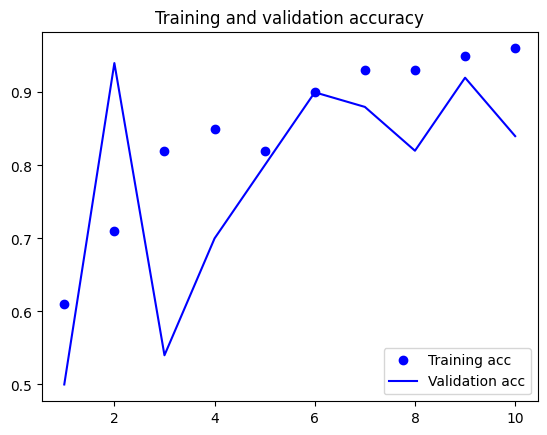

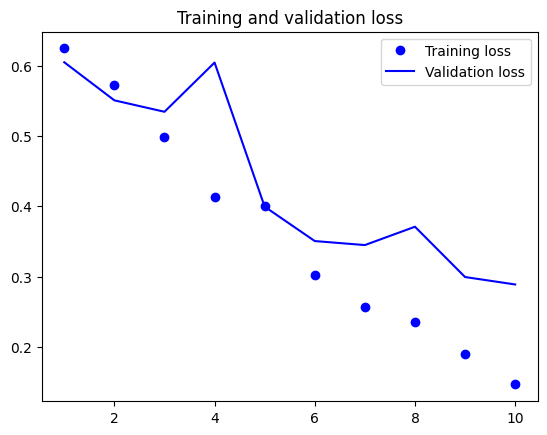

In [78]:
# Plot accuracy and loss

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Adjust the epochs range to match the length of val_acc
epochs = range(1, len(val_acc) + 1)

plt.plot(epochs, acc[:len(val_acc)], 'bo', label='Training acc') # Slice acc to match the length of val_acc
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss[:len(val_loss)], 'bo', label='Training loss') # Slice loss to match the length of val_loss
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [79]:
# Examine preds
tmp = model.predict(validation_generator)
# difficult with a generator to get actual model fit
# generator is acting randomly; it's an iterator
# have to retain X data and y label and store them
# else get diff answers when run (yup)
print(tmp.shape)
print(tmp[0:5])
pred = np.round(tmp,0)
print(pred.shape)
print(pred[0:5])

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 204ms/step
(50, 1)
[[0.46050778]
 [0.53948617]
 [0.59762454]
 [0.27340508]
 [0.5395188 ]]
(50, 1)
[[0.]
 [1.]
 [1.]
 [0.]
 [1.]]


In [80]:
validation_generator.labels   # in order, not like predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1], dtype=int32)

In [81]:
# Generators are hard to work with -
# You need to extract both the label and prediction at once -
# Otherwise order is compromised
def flatten(l):
    return [item for sublist in l for item in sublist]

In [83]:
# Prepare data for confusion matrix
my_results = pd.DataFrame(columns=['actual','pred'])
batches = 0
for x_val, y_val in validation_generator:
  batches=batches+1
  y_pred = model.predict(x_val) # predictions are a list of lists, so have to be flattened to single list
  y_pred = flatten(y_pred)
  tmp = pd.DataFrame({'actual': y_val, 'pred': y_pred})
  my_results = pd.concat([my_results, tmp])
#  if batches >= val_steps_per_epoch:
  if batches >= 1000 // 31:   # hard coded
    # we need to break the loop by hand because
    # the generator loops indefinitely
    break

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


<ipython-input-83-f9ade5f2b928>:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  my_results = pd.concat([my_results, tmp])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━

In [84]:
# Examine actual vs predictions
my_results

,actual,pred
0,1.0,0.597625
1,0.0,0.460508
2,1.0,0.930787
3,0.0,0.198585
4,0.0,0.133884
...,...,...
0,1.0,0.985930
1,1.0,0.983576
2,1.0,0.597625
3,0.0,0.134452


In [85]:
from sklearn.metrics import classification_report
print(classification_report(y_true=my_results['actual'],
                            y_pred=np.round(my_results['pred'],0)))

              precision    recall  f1-score   support

         0.0       1.00      0.69      0.81        80
         1.0       0.76      1.00      0.86        80

    accuracy                           0.84       160
   macro avg       0.88      0.84      0.84       160
weighted avg       0.88      0.84      0.84       160



# Build, Compile, Fit Model 2: 3 Conv Layers, 3 MaxPooling, Epochs = 20

We saw that model accuracy was dropping in some epochs to 0 in Model 1. Let's see if reducing complexity by removing layers and nodes generates different results, keeping all else constant (no augmentation).

## Build Network


In [111]:
model = models.Sequential()
# 3 convolution layers and 3 max pooling layers
model.add(layers.Conv2D(16, (3, 3), activation='relu',  # 3x3 kernels, stride along image = 1
                                                        # 32 kernels resujlting in 32 feature maps; light down sampling
                        input_shape=(150, 150, 3)))     # color image: 3 channels, each image is 150x150
model.add(layers.MaxPooling2D((2, 2)))    # no trainable parms; agressive down sampling in pooling step

model.add(layers.Conv2D(32, (3, 3), activation='relu')) # increasing # of filters for fine tuning
model.add(layers.MaxPooling2D((2, 2)))    # no trainable parms; agressive down sampling in pooling step

model.add(layers.Conv2D(64, (3, 3), activation='relu')) # increasing # of filters for fine tuning
model.add(layers.MaxPooling2D((2, 2)))    # no trainable parms; agressive down sampling in pooling step

model.add(layers.Flatten())

model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [112]:
# Examine model
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)                   │ (None, 148, 148, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 74, 74, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 72, 72, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 36, 36, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 34, 34, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 17, 17, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 18496)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │       2,367,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,391,329 (9.12 MB)

 Trainable params: 2,391,329 (9.12 MB)

 Non-trainable params: 0 (0.00 B)

In [113]:
# Compile model
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(learning_rate=0.001),   # try Adam
              metrics=['acc'])

## Prepare Data for Modeling

In [114]:
# Need to reset generators
# When you rerun a model without resetting the generators, they continue from their previous state.
# This means that they might be iterating over the same batches of data,
# which can lead to the model getting stuck in a local minimum or overfitting.

train_generator.reset()
validation_generator.reset()

In [98]:
# This code is from O'Reilly
# Note naming mismatch
# Data should be formatted into appropriately preprocessed floating-point tensors
# before being fed into the network
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_dir = '/content/images_dataset/train'
validation_dir = '/content/images_dataset/validation'

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=5,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=5,
        class_mode='binary')

Found 100 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


In [99]:
# Examine generator output
for data_batch, labels_batch in train_generator:
  print('data batch shape:', data_batch.shape)
  print('labels batch shape:', labels_batch.shape)
  break     # generator yields batches indef so have to break
# Batches of 150 × 150 RGB images (shape (20, 150, 150, 3)) and binary labels (shape (20,)).
# There are 20 samples in each batch (the batch size).

data batch shape: (5, 150, 150, 3)
labels batch shape: (5,)


In [100]:
# Refresh
steps_per_epoch=train_generator.samples // train_generator.batch_size
print("train_generator.samples:", train_generator.samples)
print("train_generator.batch_size:", train_generator.batch_size)
print("steps per epoch:", steps_per_epoch)
validation_steps=validation_generator.samples // validation_generator.batch_size
print("validation_generator.samples:", validation_generator.samples)
print("validation_generator.batch_size:", validation_generator.batch_size)
print("validation steps:", validation_steps)

train_generator.samples: 100
train_generator.batch_size: 5
steps per epoch: 20
validation_generator.samples: 50
validation_generator.batch_size: 5
validation steps: 10


## Fit Model

In [101]:
# Fit the model using a batch generator
# Define number of epochs, dynamically calculate steps_per_epoch, validation_steps
epochs = 20     # increased from 10

history = model.fit(
    train_generator,
# steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
# validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=epochs
)

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 393ms/step - acc: 0.5099 - loss: 0.8938 - val_acc: 0.8400 - val_loss: 0.5409
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 441ms/step - acc: 0.7014 - loss: 0.5515 - val_acc: 0.7600 - val_loss: 0.5142
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 421ms/step - acc: 0.8610 - loss: 0.2883 - val_acc: 0.8200 - val_loss: 0.4340
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 370ms/step - acc: 0.9628 - loss: 0.1982 - val_acc: 0.8600 - val_loss: 0.3074
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 455ms/step - acc: 0.9292 - loss: 0.1677 - val_acc: 0.8600 - val_loss: 0.2759
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 433ms/step - acc: 0.8216 - loss: 0.2887 - val_acc: 0.8400 - val_loss: 0.4152
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 371ms/step - acc: 0.9740 - loss: 0.1009 - val_acc: 0.8600 - val_loss: 0.5328
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 453ms/step - acc: 0.9781 - loss: 0.0678 - val_acc: 0.9200 - val_loss: 0.2816
Epoch 9/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 440ms/step - 

In [102]:
# Save model
model.save('horses_and_zebras_model2.keras')

# Evaluate Model 2

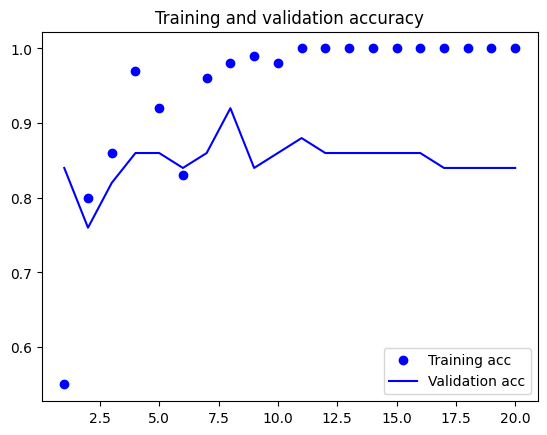

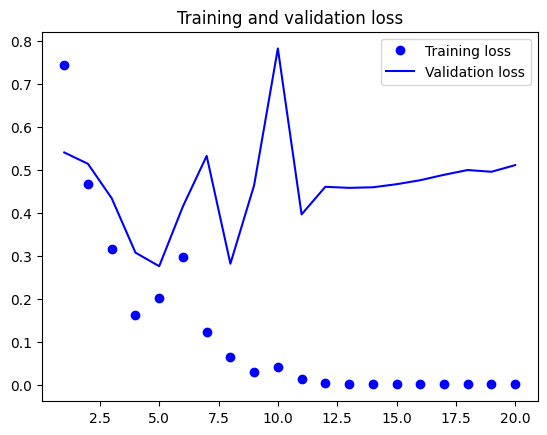

In [103]:
# Plot accuracy and loss

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Adjust the epochs range to match the length of val_acc
epochs = range(1, len(val_acc) + 1)

plt.plot(epochs, acc[:len(val_acc)], 'bo', label='Training acc') # Slice acc to match the length of val_acc
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss[:len(val_loss)], 'bo', label='Training loss') # Slice loss to match the length of val_loss
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [104]:
# Examine preds
tmp = model.predict(validation_generator)
# difficult with a generator to get actual model fit
# generator is acting randomly; it's an iterator
# have to retain X data and y label and store them
# else get diff answers when run (yup)
print(tmp.shape)
print(tmp[0:5])
pred = np.round(tmp,0)
print(pred.shape)
print(pred[0:5])

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 222ms/step
(50, 1)
[[9.9999350e-01]
 [9.9338007e-01]
 [3.3115321e-01]
 [3.7617967e-04]
 [9.9999213e-01]]
(50, 1)
[[1.]
 [1.]
 [0.]
 [0.]
 [1.]]


In [105]:
validation_generator.labels   # in order, not like predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1], dtype=int32)

In [106]:
# Generators are hard to work with -
# You need to extract both the label and prediction at once -
# Otherwise order is compromised
def flatten(l):
    return [item for sublist in l for item in sublist]

In [107]:
# Prepare confusion matrix
my_results = pd.DataFrame(columns=['actual','pred'])
batches = 0
for x_val, y_val in validation_generator:
  batches=batches+1
  y_pred = model.predict(x_val) # predictions are a list of lists, so have to be flattened to single list
  y_pred = flatten(y_pred)
  tmp = pd.DataFrame({'actual': y_val, 'pred': y_pred})
  my_results = pd.concat([my_results, tmp])
#  if batches >= val_steps_per_epoch:
  if batches >= 1000 // 31:   # hard coded
    # we need to break the loop by hand because
    # the generator loops indefinitely
    break

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


<ipython-input-107-8497b027fddd>:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  my_results = pd.concat([my_results, tmp])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━

In [108]:
# Examine actual vs predictions
my_results

,actual,pred
0,0.0,0.000338
1,0.0,0.000102
2,0.0,0.000150
3,1.0,1.000000
4,1.0,0.743255
...,...,...
0,1.0,0.999262
1,0.0,0.000102
2,0.0,0.001282
3,0.0,0.000338


In [110]:
from sklearn.metrics import classification_report
print(classification_report(y_true=my_results['actual'],
                            y_pred=np.round(my_results['pred'],0)))

              precision    recall  f1-score   support

         0.0       0.85      0.85      0.85        81
         1.0       0.85      0.85      0.85        79

    accuracy                           0.85       160
   macro avg       0.85      0.85      0.85       160
weighted avg       0.85      0.85      0.85       160



# Build, Compile, Fit Model 3: 3 Conv Layers, 3 MaxPooling, Epochs = 10, With Augmented Images

Model 1 but add augmented images.

DD: Overfitting is caused by having too few samples to learn from, rendering us unable to train a model able to generalize to new data.
Given infinite data, our model would be exposed to every possible aspect of the data distribution at hand: we would never overfit. Data
augmentation takes the approach of generating more training data from existing training samples, by "augmenting" the samples via a number
of random transformations that yield believable-looking images. The goal is that at training time, our model would never see the exact same
picture twice. This helps the model get exposed to more aspects of the data and generalize better.

## Build Network

In [117]:
model = models.Sequential()
# 3 convolution layers and 3 max pooling layers
model.add(layers.Conv2D(16, (3, 3), activation='relu',  # 3x3 kernels, stride along image = 1
                                                        # 32 kernels resujlting in 32 feature maps; light down sampling
                        input_shape=(150, 150, 3)))     # color image: 3 channels, each image is 150x150
model.add(layers.MaxPooling2D((2, 2)))    # no trainable parms; agressive down sampling in pooling step

model.add(layers.Conv2D(32, (3, 3), activation='relu')) # increasing # of filters for fine tuning
model.add(layers.MaxPooling2D((2, 2)))    # no trainable parms; agressive down sampling in pooling step

model.add(layers.Conv2D(64, (3, 3), activation='relu')) # increasing # of filters for fine tuning
model.add(layers.MaxPooling2D((2, 2)))    # no trainable parms; agressive down sampling in pooling step

model.add(layers.Flatten())

model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [118]:
# Examine model
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)                   │ (None, 148, 148, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 74, 74, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 72, 72, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ (None, 36, 36, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 34, 34, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_23 (MaxPooling2D)      │ (None, 17, 17, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 18496)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 128)                 │       2,367,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,391,329 (9.12 MB)

 Trainable params: 2,391,329 (9.12 MB)

 Non-trainable params: 0 (0.00 B)

In [119]:
# Compile model
model.compile(loss='binary_crossentropy',
#              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              optimizer=optimizers.Adam(learning_rate=0.001),
              metrics=['acc'])

## Prepare Data for Modeling

In [120]:
# Need to reset generators
# When you rerun a model without resetting the generators, they continue from their previous state.
# This means that they might be iterating over the same batches of data,
# which can lead to the model getting stuck in a local minimum or overfitting.

train_generator.reset()
validation_generator.reset()

In [122]:
# Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# Note that the validation data should not be augmented!
# we simply scale it by the max value (255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_dir = '/content/images_dataset/train'
validation_dir = '/content/images_dataset/validation'

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
#        batch_size=20,
        batch_size=5,    # consistent with Models 1,2
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=5,    # consistent with Models 1,2
        class_mode='binary')

# number of images
train_num_images = len(list(train_generator.filepaths))
val_num_images = len(list(validation_generator.filepaths))

Found 100 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


In [123]:
# Examine generator output
for data_batch, labels_batch in train_generator:
  print('data batch shape:', data_batch.shape)
  print('labels batch shape:', labels_batch.shape)
  break     # generator yields batches indef so have to break
# Batches of 150 × 150 RGB images (shape (20, 150, 150, 3)) and binary labels (shape (20,)).
# There are 20 samples in each batch (the batch size).

data batch shape: (5, 150, 150, 3)
labels batch shape: (5,)


## Fit Model

In [124]:
# Fit the model using a batch generator
# Define number of epochs, dynamically calculate steps_per_epoch, validation_steps
epochs = 10

history = model.fit(
    train_generator,
# steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
# validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=epochs
)

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 17s 555ms/step - acc: 0.5746 - loss: 0.6999 - val_acc: 0.5000 - val_loss: 0.6117
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 418ms/step - acc: 0.6629 - loss: 0.6274 - val_acc: 0.8400 - val_loss: 0.5314
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 567ms/step - acc: 0.7739 - loss: 0.5148 - val_acc: 0.6200 - val_loss: 0.7828
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 23s 695ms/step - acc: 0.8491 - loss: 0.3850 - val_acc: 0.8000 - val_loss: 0.5677
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 595ms/step - acc: 0.8484 - loss: 0.3388 - val_acc: 0.8600 - val_loss: 0.3603
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 552ms/step - acc: 0.9588 - loss: 0.2316 - val_acc: 0.6400 - val_loss: 1.0552
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 412ms/step - acc: 0.8806 - loss: 0.3141 - val_acc: 0.8800 - val_loss: 0.3022
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 519ms/step - acc: 0.9107 - loss: 0.2082 - val_acc: 0.6400 - val_loss: 1.4369
Epoch 9/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 485ms/st

In [132]:
# Save model
model.save('horses_and_zebras_model3.keras')

# Evaluate Model 3

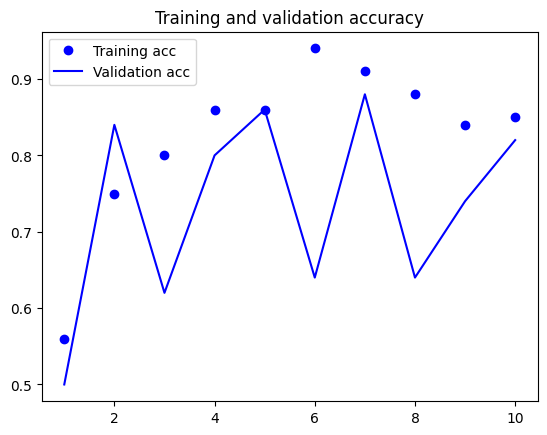

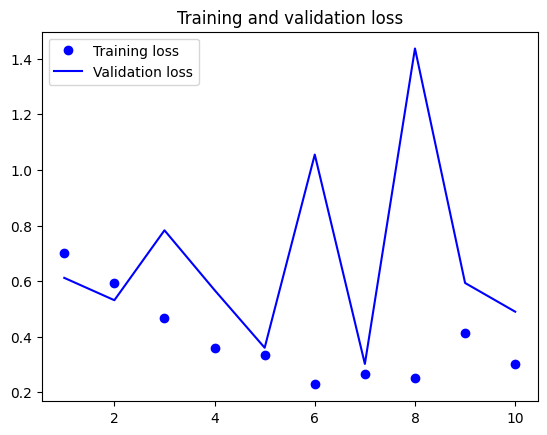

In [125]:
# Plot accuracy and loss

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Adjust the epochs range to match the length of val_acc
epochs = range(1, len(val_acc) + 1)

plt.plot(epochs, acc[:len(val_acc)], 'bo', label='Training acc') # Slice acc to match the length of val_acc
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss[:len(val_loss)], 'bo', label='Training loss') # Slice loss to match the length of val_loss
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [126]:
# Examine preds
tmp = model.predict(validation_generator)
# difficult with a generator to get actual model fit
# generator is acting randomly; it's an iterator
# have to retain X data and y label and store them
# else get diff answers when run (yup)
print(tmp.shape)
print(tmp[0:5])
pred = np.round(tmp,0)
print(pred.shape)
print(pred[0:5])

10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 225ms/step
(50, 1)
[[9.2414308e-01]
 [1.4594699e-02]
 [9.9999142e-01]
 [5.5663645e-07]
 [4.7465442e-03]]
(50, 1)
[[1.]
 [0.]
 [1.]
 [0.]
 [0.]]


In [127]:
validation_generator.labels   # in order, not like predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1], dtype=int32)

In [128]:
# Generators are hard to work with -
# You need to extract both the label and prediction at once -
# Otherwise order is compromised
def flatten(l):
    return [item for sublist in l for item in sublist]

In [129]:
# Prepare confusion matrix
my_results = pd.DataFrame(columns=['actual','pred'])
batches = 0
for x_val, y_val in validation_generator:
  batches=batches+1
  y_pred = model.predict(x_val) # predictions are a list of lists, so have to be flattened to single list
  y_pred = flatten(y_pred)
  tmp = pd.DataFrame({'actual': y_val, 'pred': y_pred})
  my_results = pd.concat([my_results, tmp])
#  if batches >= val_steps_per_epoch:
  if batches >= 1000 // 31:   # hard coded
    # we need to break the loop by hand because
    # the generator loops indefinitely
    break

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


<ipython-input-129-8497b027fddd>:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  my_results = pd.concat([my_results, tmp])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━

In [130]:
# Examine actual vs predictions
my_results

,actual,pred
0,0.0,0.601674
1,1.0,0.999979
2,0.0,0.001079
3,0.0,0.000146
4,0.0,0.024646
...,...,...
0,0.0,0.693139
1,1.0,1.000000
2,0.0,0.000146
3,0.0,0.298111


In [131]:
from sklearn.metrics import classification_report
print(classification_report(y_true=my_results['actual'],
                            y_pred=np.round(my_results['pred'],0)))

              precision    recall  f1-score   support

         0.0       1.00      0.65      0.79        81
         1.0       0.74      1.00      0.85        79

    accuracy                           0.82       160
   macro avg       0.87      0.83      0.82       160
weighted avg       0.87      0.82      0.82       160



# Bullet Points/Conclusions

1. Data: I was interested in seeing whether a convnet could distinguish between similar animals such as a horse and a zebra, and whether the black/white stripes of a zebra would prove problematic. I initially tried to download 200 images EACH for horses and zebras, to create a 100/50/50 train/val/test split, with additional criteria for main horse and zebra colors, but abandoned that attempt after the download ran over an hour. Understanding that reducing the horse and zebra datasets to 100 images each with a 50/25/25 split might really be limiting, this is what I went with. Also, examining the images, I could see one-off images for zebra - an image of a zebra *print, e.g., like a sample of zebra striped material, not an animal. Garbage in, garbage out. I also found that the image extensions varied (jpg, JPG, JPEG, png) so selecting images by including the extension name excluded some images initially - another reason to always examine and count.
2. My initial 4 layer convnet with maxpooling model had 32/64/128 feature maps and a final dense layer of 512 nodes (model.add(layers.Dense(512, activation='relu')). This model resulted in running out of training data in epoch 2. I didn't understand the problem initially because the output log showed that *every other* epoch (2,4,6 etc.) had a training accuracy of 0. The pertinent fact was that the model was running out of data in epoch 2; the fact that you could see training accuracy = 0 in every other epoch was secondary. I needed to focus on the cause of running out of data in epoch 2.
3. Given the (small) size of the training dataset, I ran models whose layers had reduced output features, a reduced number of nodes in the final dense layer, and different epochs. This solved the problem of running out of data in epoch 2.
4. Model 1's accuracy and loss plots looked pretty good, based on 10 epochs, with a weighted average F1 score of 0.84, but I wanted to see whether extending epochs to 20 in Model 2 would improve performance. It did not; see the plateauing in the plots at around epoch 10. Model 2 had a similar weighted average F1 score but it was at the expense of TPs and TNs.
5. Model 3 introduced augmentation, which I was hoping (expecting?) to improve performance, keeping all other model parameters constant. This was not the case, with the accuracy and loss plots showing less consistent trend lines and the weighted F1 score declining. Why would this happen? Would it be worth playing with augmentation parameters? Poorer results could be from irrelevant transformations if the augmentation technigues aren't relevant to the particular task or unrealistic variations being generated, confusing the model. More investigation into the augmentation parameters particularly appropriate for image classification would be needed.
6. Strangely, I found that if I specified

  steps_per_epoch=train_generator.samples // train_generator.batch_size
  validation_steps=validation_generator.samples // validation_generator.batch_size

  in the model.fit statement, even after confirming that the calculations were correct, I could not get past epoch 2 (running out of data). If I commented that code out, the model would run as expected. This is confusing to me because when I researched omitting the statements, this is what I found:

  When using generators with model.fit(), Keras can automatically determine the steps_per_epoch and validation_steps based on the samples attribute of your generators and the specified batch_size. If you don't explicitly provide these arguments, Keras will calculate them as follows:

  steps_per_epoch = total_training_samples // batch_size
  validation_steps = total_validation_samples // batch_size

  The implication is that the default code is the same as what my code was calculating, so I'm not sure why commenting out those statements helped the model to not run out of training data (office hours question).